## Step 0: Import libraries and dataset

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing dataset
train = pd.read_csv('/content/sample_data/train (1).csv')
test = pd.read_csv('/content/sample_data/test.csv')

FileNotFoundError: ignored

## Step 1: Descriptive analysis

In [ ]:
# Preview training dataset
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
# Preview testing dataset
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
# Training dataset dimensions - (rows, columns)
print('Training data: \nRows: {} Columns: {}'.format(train.shape[0], train.shape[1]))

Training data: 
Rows: 550068 Columns: 12


In [ ]:
# Testing dataset dimensions - (rows, columns)
print('Testing data: \nRows: {} Columns: {}'.format(test.shape[0], test.shape[1]))

Testing data: 
Rows: 233599 Columns: 11


In [ ]:
# Features data-type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
# Statistical summary
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [ ]:
# Checking for Null values
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

In [ ]:
# Checking the counts of unique values
round((train['Age'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

26-35    39.92 %
36-45     20.0 %
18-25    18.12 %
46-50     8.31 %
51-55      7.0 %
55+       3.91 %
0-17      2.75 %
Name: Age, dtype: object

In [ ]:
# Checking the counts of unique values
round((train['Stay_In_Current_City_Years'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

1     35.24 %
2     18.51 %
3     17.32 %
4+     15.4 %
0     13.53 %
Name: Stay_In_Current_City_Years, dtype: object

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
The feature 'Product_Category_2' contains 31.57% null values which can be imputed whereas 'Product_Category_3' contains 69.67% null values so we can drop this feature.
</p></li>    

<li><p style="font-family:verdana;">
The features 'Age' and 'Stay_In_Current_City_Years' contain some values which have '+' in them which need to be replaced.
</p></li>    

</ul>

</div>

## Step 2: Exploratory Data Analysis

### 2.1 Univariate Analysis

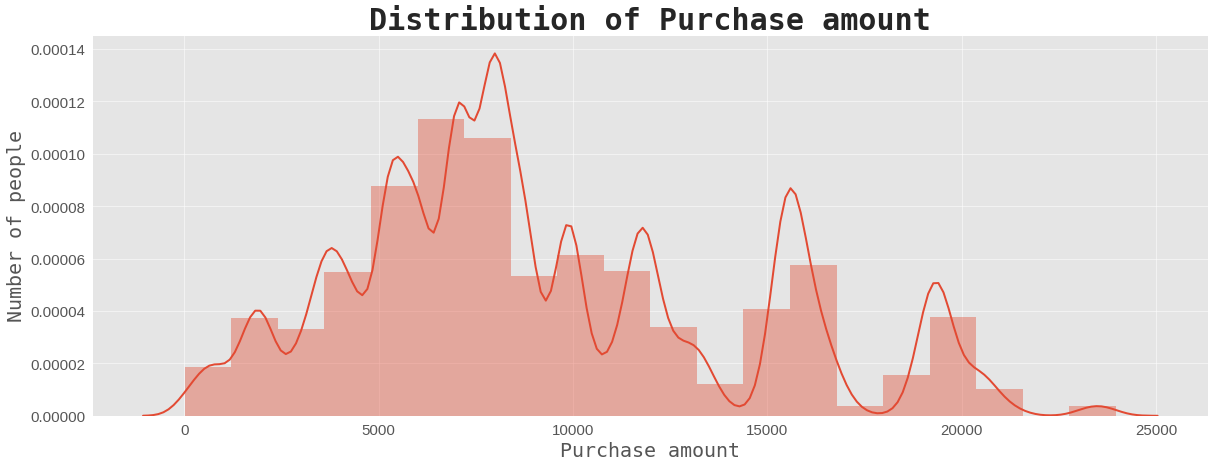

In [ ]:
# Creating a distplot for dependent feature 'Purchase'
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
sns.distplot(train['Purchase'], bins = 20)
plt.title('Distribution of Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

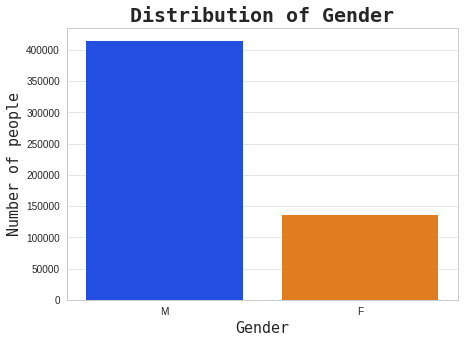

In [ ]:
# Creating a barplot for 'Gender'
gen = train['Gender'].value_counts()

plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('Distribution of Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

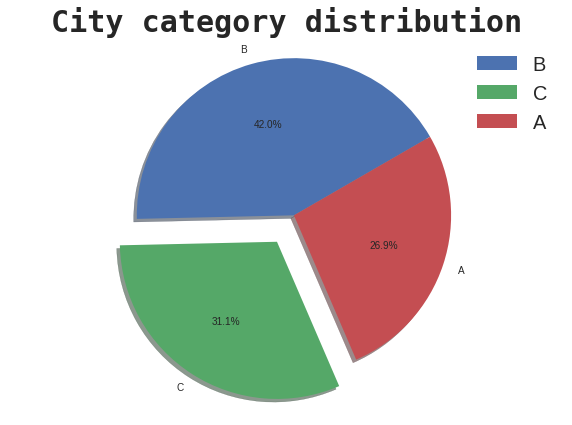

In [ ]:
# Creating a pie chart for 'City Category'
city = train['City_Category'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize = (10, 7))
plt.pie(city.values, labels = city.index, startangle = 30, explode = (0 , 0.20, 0), shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

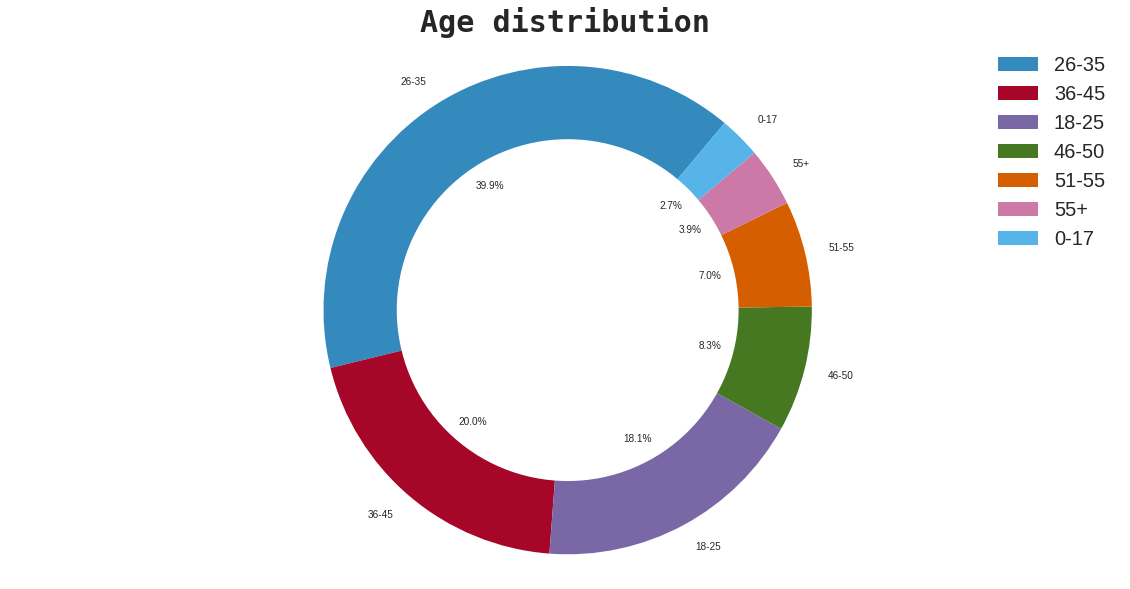

In [ ]:
# Creating a donut chart for 'Age'
age = train['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (20, 10))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis('equal')
plt.legend(prop = {'size' : 20})
plt.show()

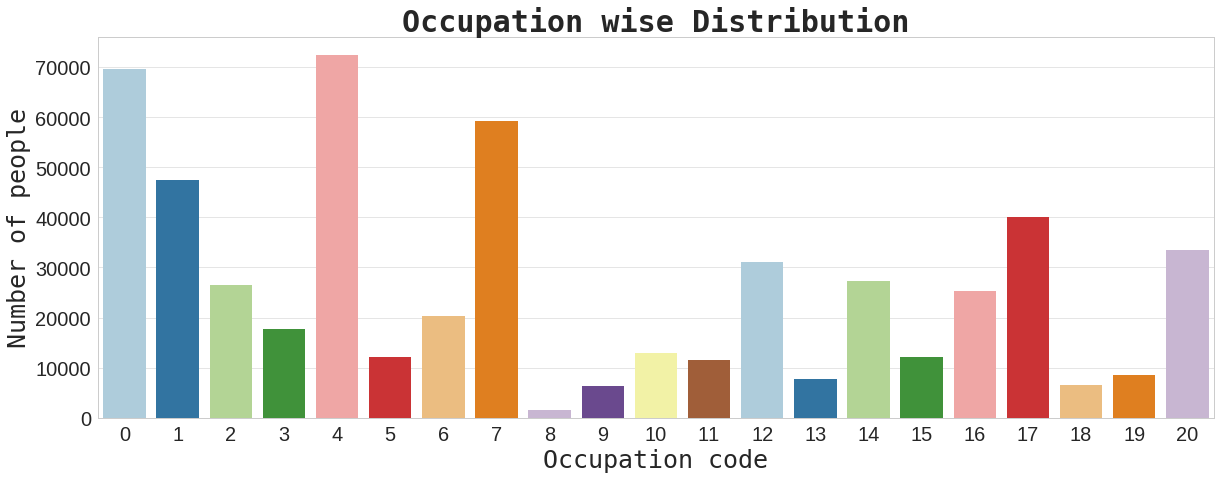

In [ ]:
# Creating a barplot for 'Occupation'
occupation = train['Occupation'].value_counts()

plt.figure(figsize = (20, 7))
plt.style.use('seaborn-whitegrid')
sns.barplot(occupation.index, occupation.values, palette = 'Paired')
plt.title('Occupation wise Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.tick_params(labelsize = 20)
plt.show()

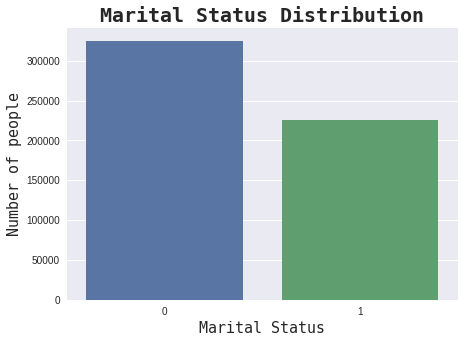

In [ ]:
# Creating a countplot for 'Marital Status'
plt.style.use('seaborn')
plt.figure(figsize = (7, 5))
sns.countplot(train['Marital_Status'])
plt.title('Marital Status Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

### 2.2 Bivariate Analysis

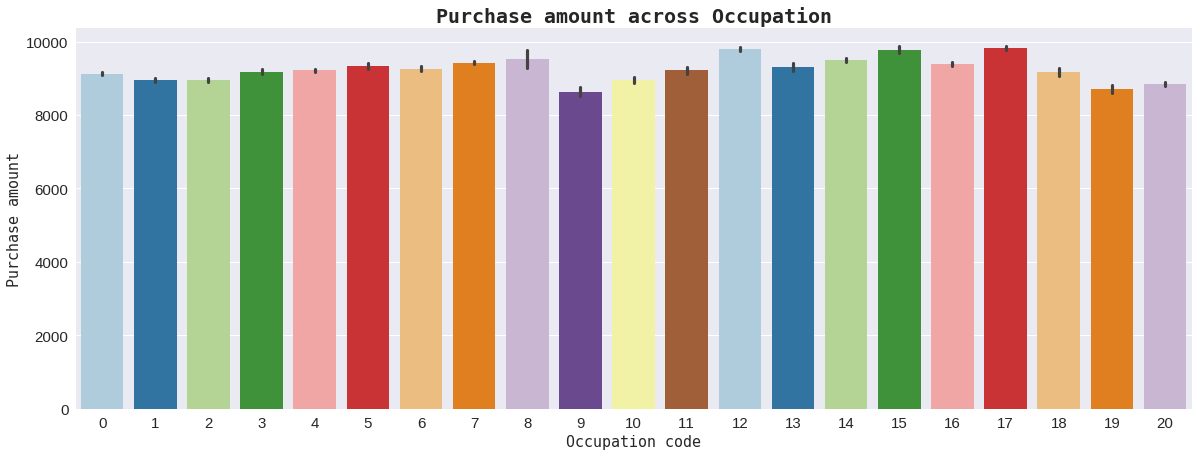

In [ ]:
# Creating a barplot of 'Occupation vs Purchase'
plt.figure(figsize = (20, 7))
plt.style.use('seaborn')
sns.barplot(train['Occupation'], train['Purchase'], palette = 'Paired')
plt.title('Purchase amount across Occupation', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 15)
plt.show()

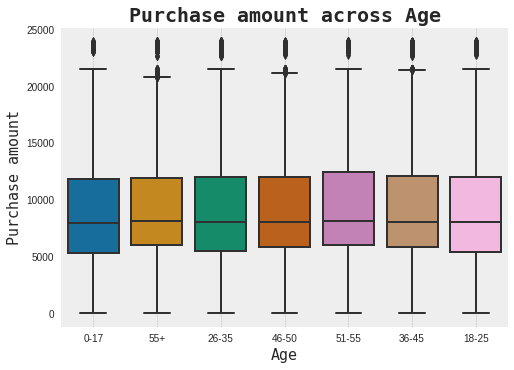

In [ ]:
# Creating a boxplot of 'Age vs Purchase'
plt.style.use('bmh')
sns.boxplot(train['Age'], train['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.grid()
plt.show()

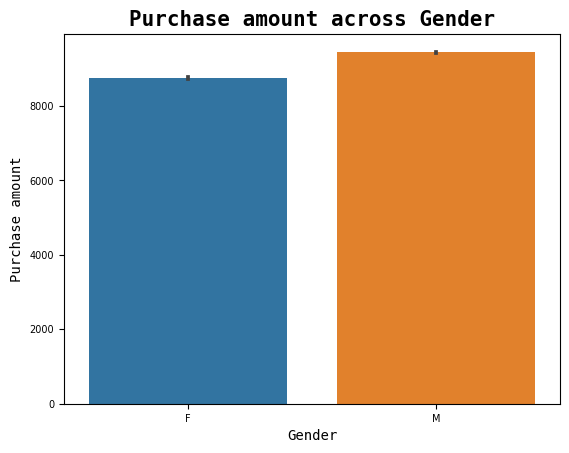

In [ ]:
# Creating a barplot of 'Gender vs Purchase'
plt.style.use('default')
sns.barplot(train['Gender'], train['Purchase'])
plt.title('Purchase amount across Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)

plt.show()

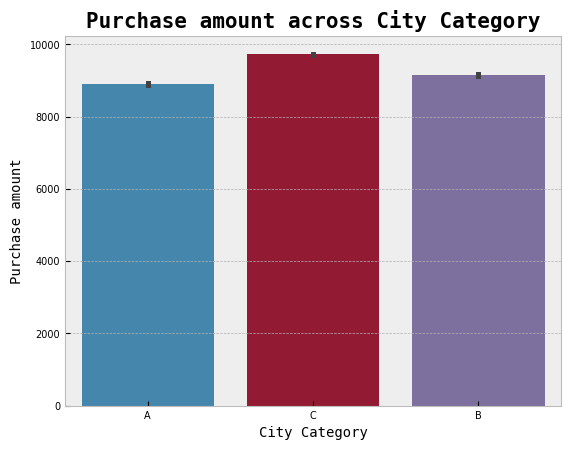

In [ ]:
# Creating a barplot of 'City_Category vs Purchase'
plt.style.use('bmh')
sns.barplot(train['City_Category'], train['Purchase'])
plt.title('Purchase amount across City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

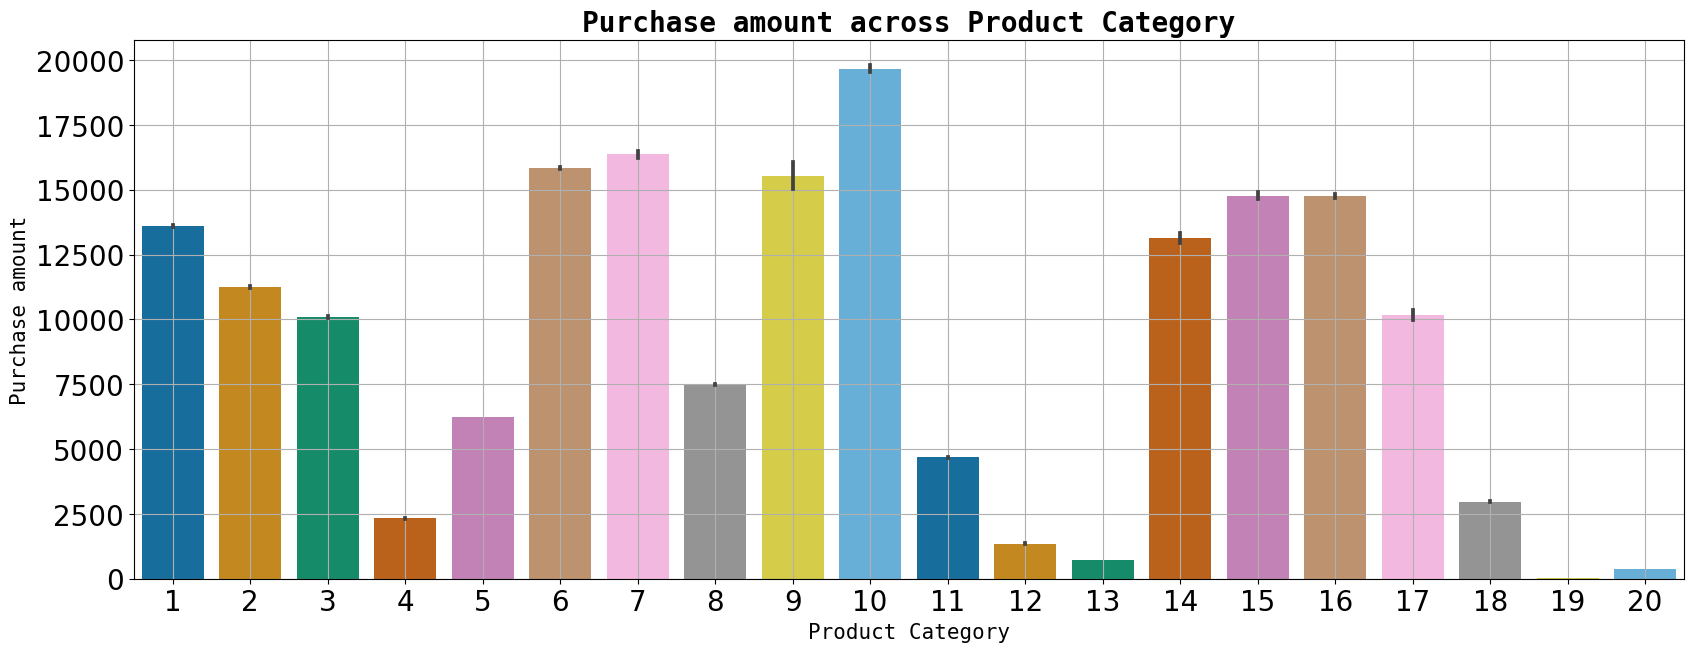

In [ ]:
# Creating a barplot of 'Product_Category_1 vs Purchase'
plt.style.use('default')
plt.figure(figsize = (20, 7))
sns.barplot(train['Product_Category_1'], train['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 20)
plt.grid()
plt.show()

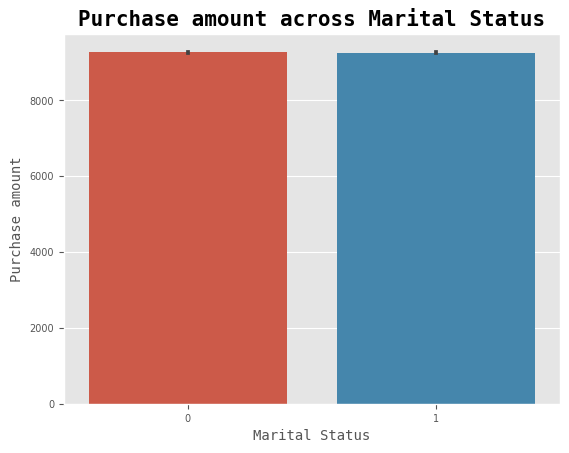

In [ ]:
# Creating a barplot of 'Marital Status vs Purchase'
plt.style.use('ggplot')
sns.barplot(train['Marital_Status'], train['Purchase'])
plt.title('Purchase amount across Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

### 2.3 Multivariate Analysis

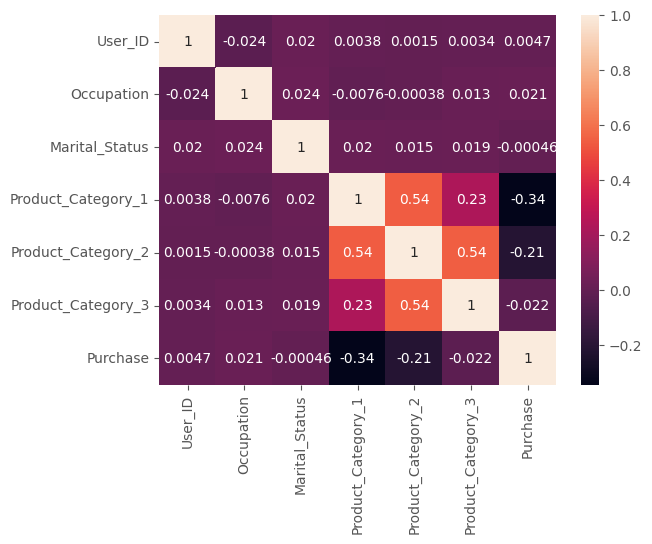

In [ ]:
# Creating a heatmap of correlation matrix
sns.heatmap(train.corr(), annot = True)
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
An interesting observation can be made from the gender distribution plot that the number of females was less than the number of men who shopped during Black Friday.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can observe that the dependent feature 'Purchase' is highly correlated with 'Product_Category_1' and 'Product_Category_2'.
</p></li>    

</ul>

</div>

## Step 3: Data preprocessing

### 3.1: Merging of train and test

In [ ]:
train['source'] = 'train'
test['source'] = 'test'

In [ ]:
dataset = pd.concat([train, test])

### 3.2: Replacing '+' in 'Age' and 'Stay_In_Current_City_Years'

In [ ]:
dataset['Age'] = dataset['Age'].apply(lambda x : str(x).replace('55+', '55'))

In [ ]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

### 3.3: Dropping irrelevant features

In [ ]:
dataset.drop('Product_Category_3', axis = 1, inplace = True)

In [ ]:
dataset.drop('User_ID', axis = 1, inplace = True)

In [ ]:
dataset.drop('Product_ID', axis = 1, inplace = True)

### 3.4: Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_gender = LabelEncoder()
dataset['Gender'] = label_encoder_gender.fit_transform(dataset['Gender'])

In [ ]:
label_encoder_age = LabelEncoder()
dataset['Age'] = label_encoder_age.fit_transform(dataset['Age'])

In [ ]:
label_encoder_city = LabelEncoder()
dataset['City_Category'] = label_encoder_city.fit_transform(dataset['City_Category'])

### 3.5: Fixing null values in 'Product_Category_2'

In [ ]:
dataset['Product_Category_2'].fillna(dataset['Product_Category_2'].median(), inplace = True)

In [ ]:
dataset['Purchase'].fillna(dataset['Purchase'].median(), inplace = True)

In [ ]:
dataset['Occupation'].fillna(dataset['Occupation'].median(), inplace = True)

In [ ]:
dataset['Marital_Status'].fillna(0.0, inplace = True)

In [ ]:
dataset['Product_Category_1'].fillna(dataset['Product_Category_1'].median(), inplace = True)

### 3.6: Convert 'Stay_In_Current_City_Years' into numeric data type

In [ ]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].astype('float').astype(int)
dataset.head(26)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,source
0,F,0-17,10,A,2,0,3,9.0,8370.0,train
1,F,0-17,10,A,2,0,1,6.0,15200.0,train
2,F,0-17,10,A,2,0,12,9.0,1422.0,train
3,F,0-17,10,A,2,0,12,14.0,1057.0,train
4,M,55,16,C,4,0,8,9.0,7969.0,train
5,M,26-35,15,A,3,0,1,2.0,15227.0,train
6,M,46-50,7,B,2,1,1,8.0,19215.0,train
7,M,46-50,7,B,2,1,1,15.0,15854.0,train
8,M,46-50,7,B,2,1,1,16.0,15686.0,train
9,M,26-35,20,A,1,1,8,9.0,7871.0,train


### 3.7: Separating dataset into train and test

In [ ]:
train = dataset.loc[dataset['source'] == 'train']
test = dataset.loc[dataset['source'] == 'test']

In [ ]:
train.drop('source', axis = 1, inplace = True)
test.drop('source', axis = 1, inplace = True)

### 3.8: Separating train into X and Y

In [ ]:
X = train.drop("Purchase", axis = 1)

In [ ]:
Y = train["Purchase"]

### 3.9: Feature Selection

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selector = ExtraTreesRegressor()

In [ ]:
selector.fit(X, Y)

ExtraTreesRegressor()

In [ ]:
feature_imp = selector.feature_importances_

In [ ]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 0.47
1 2.07
2 4.89
3 0.73
4 2.55
5 0.6
6 80.84
7 7.84


In [ ]:
X.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

### 3.10: Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
for col in X.columns:
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [ ]:
X.head(26)

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
0,-1.844248,0.294864,0.109801,-0.610809,-0.136401
1,-1.844248,0.294864,0.109801,-1.118912,-0.846289
2,-1.844248,0.294864,0.109801,1.675656,-0.136401
3,-1.844248,0.294864,0.109801,1.675656,1.046745
4,2.588277,1.214734,1.660861,0.659449,-0.136401
5,-0.366739,1.061423,0.885331,-1.118912,-1.792805
6,1.110769,-0.165072,0.109801,-1.118912,-0.373030
7,1.110769,-0.165072,0.109801,-1.118912,1.283374
8,1.110769,-0.165072,0.109801,-1.118912,1.520003
9,-0.366739,1.827982,-0.665728,0.659449,-0.136401


### 3.11: Creating a train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (440054, 5)
X_test shape: (110014, 5)
Y_train shape: (440054,)
Y_test shape: (110014,)


## Step 4: Data Modelling

### 4.1: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred_lin_reg = lin_reg.predict(X_test)

### 4.2: KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
Y_pred_knn = knn.predict(X_test)

### 4.3: Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()

In [ ]:
dec_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
Y_pred_dec = dec_tree.predict(X_test)

### 4.4: Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor()

In [ ]:
ran_for.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
Y_pred_ran_for = ran_for.predict(X_test)

### 4.5: XGB Regressor

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 42)

In [ ]:
xgb.fit(X_train, Y_train)

[10:36:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=42)

In [ ]:
Y_pred_xgb = xgb.predict(X_test)

### 4.6: CATBoost Regression

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostRegressor
cb=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')

In [ ]:
cb.fit(X_train, Y_train, eval_set=(X_test, Y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 4825.9399450	test: 4814.5195422	best: 4814.5195422 (0)	total: 104ms	remaining: 5.1s
1:	learn: 4650.5436085	test: 4640.6698189	best: 4640.6698189 (1)	total: 148ms	remaining: 3.56s
2:	learn: 4507.6958563	test: 4499.2877704	best: 4499.2877704 (2)	total: 189ms	remaining: 2.96s
3:	learn: 4384.1363202	test: 4376.1626378	best: 4376.1626378 (3)	total: 229ms	remaining: 2.63s
4:	learn: 4268.2620185	test: 4261.7095282	best: 4261.7095282 (4)	total: 270ms	remaining: 2.43s
5:	learn: 4172.0442687	test: 4166.8157778	best: 4166.8157778 (5)	total: 318ms	remaining: 2.33s
6:	learn: 4084.3954637	test: 4079.6618970	best: 4079.6618970 (6)	total: 369ms	remaining: 2.27s
7:	learn: 4024.8803112	test: 4020.4730100	best: 4020.4730100 (7)	total: 410ms	remaining: 2.15s
8:	learn: 3959.3453386	test: 3955.4295658	best: 3955.4295658 (8)	total: 450ms	remaining: 2.05s
9:	learn: 3915.0433621	test: 3911.5341096	best: 3911.5341096 (9)	total: 497ms	remaining: 1.99s
10:	learn: 3866.0951734	test: 3863.0219975	best: 38

In [ ]:
Y_pred_Cb=cb.predict(X_test)

### 4.7: RNN Regression

In [ ]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Activation, Dense
rnn = Sequential()
rnn.add(SimpleRNN(128, activation='relu', input_dim=5 , return_sequences = True))
rnn.add(SimpleRNN(64, activation='relu' ,  return_sequences = False))
# Adding dropout to prevent overfitting
#rnn.add(Dropout(0.1))
rnn.add(Dense(1, activation='sigmoid'))

In [ ]:
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 128)         17152     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 29,569
Trainable params: 29,569
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(440054, 5)
(440054,)


In [ ]:
print(X_test.shape)
print(Y_test.shape)

(110014, 5)
(110014,)


In [ ]:
X_train1 = X_train.values.reshape(440054,1,5)
Y_train1 = np.array(Y_train).reshape(440054 ,1,1)

In [ ]:
X_test1 = X_test.values.reshape(110014,1,5)
Y_test1 = np.array(Y_test).reshape(110014,1,1)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor = 'val_loss', patience=60)

history = rnn.fit(X_train1, Y_train1,
                  batch_size=100,
                  epochs=10,
                  verbose=2,
                  callbacks=[early_stop],
                  validation_data=(X_test1, Y_test1))

Epoch 1/10
4401/4401 - 27s - loss: -7.3277e+09 - accuracy: 0.0000e+00 - val_loss: -2.5864e+10 - val_accuracy: 0.0000e+00 - 27s/epoch - 6ms/step
Epoch 2/10
4401/4401 - 27s - loss: -7.4660e+10 - accuracy: 0.0000e+00 - val_loss: -1.4135e+11 - val_accuracy: 0.0000e+00 - 27s/epoch - 6ms/step
Epoch 3/10
4401/4401 - 27s - loss: -2.5200e+11 - accuracy: 0.0000e+00 - val_loss: -3.8626e+11 - val_accuracy: 0.0000e+00 - 27s/epoch - 6ms/step
Epoch 4/10
4401/4401 - 20s - loss: -5.7845e+11 - accuracy: 0.0000e+00 - val_loss: -7.9930e+11 - val_accuracy: 0.0000e+00 - 20s/epoch - 4ms/step
Epoch 5/10
4401/4401 - 21s - loss: -1.0933e+12 - accuracy: 0.0000e+00 - val_loss: -1.4195e+12 - val_accuracy: 0.0000e+00 - 21s/epoch - 5ms/step
Epoch 6/10
4401/4401 - 22s - loss: -1.8356e+12 - accuracy: 0.0000e+00 - val_loss: -2.2855e+12 - val_accuracy: 0.0000e+00 - 22s/epoch - 5ms/step
Epoch 7/10
4401/4401 - 21s - loss: -2.8414e+12 - accuracy: 0.0000e+00 - val_loss: -3.4328e+12 - val_accuracy: 0.0000e+00 - 21s/epoch - 5

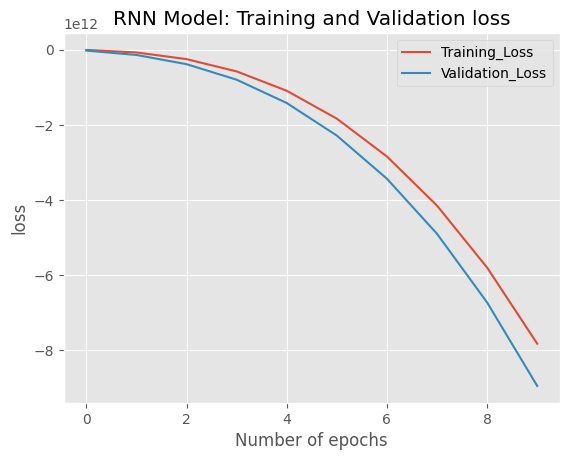

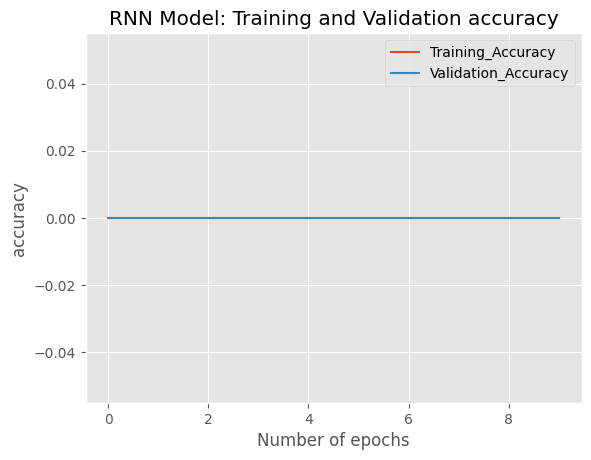

In [ ]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('RNN Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
trainPredict = rnn.predict(X_train1)
Y_Pred_rnn= rnn.predict(X_test1)

predicted=np.concatenate((trainPredict,Y_Pred_rnn),axis=0)

3438/3438 [==============================] - 7s 2ms/step


### 4.8: Support Vector Regression

In [ ]:
from sklearn.svm import SVR
X_train2=X_train.iloc[:20].values
Y_train2=Y_train.iloc[:100].values
Y_test2=Y_test.iloc[:100].values
X_train2= X_train2.reshape(-1, 1)
Y_train2= Y_train2.reshape(-1, 1)
Y_test2= Y_test2.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train2 = sc_X.fit_transform(X_train2)
Y_train2 = sc_y.fit_transform(Y_train2)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train2, Y_train2)

SVR()

In [ ]:
Y_pred_svr = regressor.predict(Y_test2)
r2_svr=r2_score(Y_test2, Y_pred_svr)/-10
r2_rnn=r2_score(Y_test, Y_Pred_rnn)/-10
# Y_pred_svr = sc_y.inverse_transform([Y_pred_svr])

## Step 5: Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_lin_reg)))
print("R2 score:", r2_score(Y_test, Y_pred_lin_reg))

Linear Regression: 
RMSE: 4699.473872577099
R2 score: 0.12103412745405762


In [ ]:
print("Support Vector Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test2, Y_pred_svr)))
r2_SVR=r2_score(Y_test2, Y_pred_svr)
print("R2 score:", r2_svr)

Support Vector Regression: 
RMSE: 10587.605731372567
R2 score: 0.2991970947558425


In [ ]:
print("KNN regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_knn)))
print("R2 score:", r2_score(Y_test, Y_pred_knn))

KNN regression: 
RMSE: 3271.359184575339
R2 score: 0.5740780756181671


In [ ]:
print("Decision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_dec)))
print("R2 score:", r2_score(Y_test, Y_pred_dec))

Decision tree regression: 
RMSE: 3065.768704055296
R2 score: 0.6259304929214127


In [ ]:
print("Random forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_ran_for)))
print("R2 score:", r2_score(Y_test, Y_pred_ran_for))

Random forest regression: 
RMSE: 3032.0442104722206
R2 score: 0.6341150101443873


In [ ]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb)))
print("R2 score:", r2_score(Y_test, Y_pred_xgb))

XGB regression: 
RMSE: 3024.8703086442342
R2 score: 0.6358443502285505


In [ ]:
print("RNN: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_Pred_rnn)))
r2_RNN=r2_score(Y_test2, Y_pred_svr)
print("R2 score:", r2_rnn)

RNN: 
RMSE: 10522.546163611683
R2 score: 0.340671753557651


In [ ]:
print("CATBOOST regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_Cb)))
print("R2 score:", r2_score(Y_test, Y_pred_Cb))

CATBOOST regression: 
RMSE: 3160.85796883466
R2 score: 0.6023660134152335
